<h1>K nearest neighbours</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Datasets/glassKnn.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


<h2>EDA</h2>

In [5]:
print(df.shape)
df.info()

(214, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [3]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


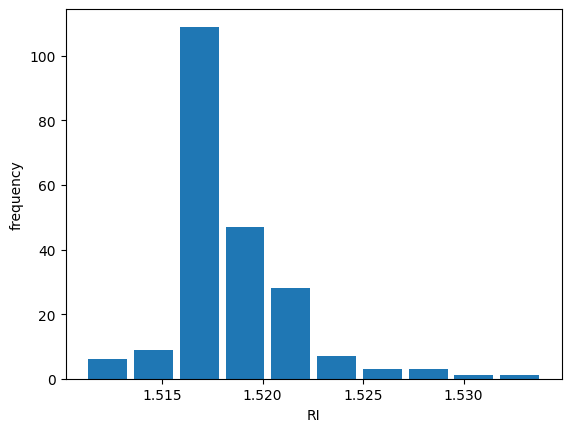

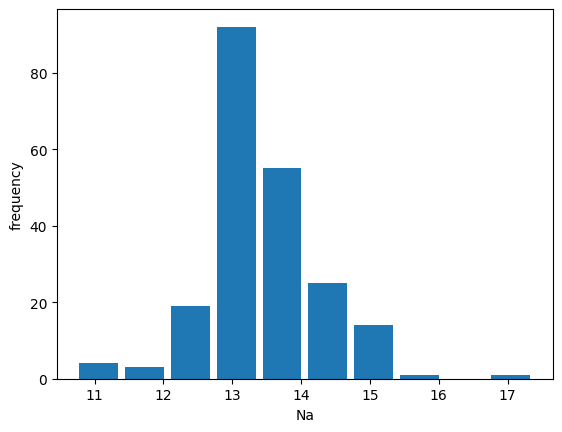

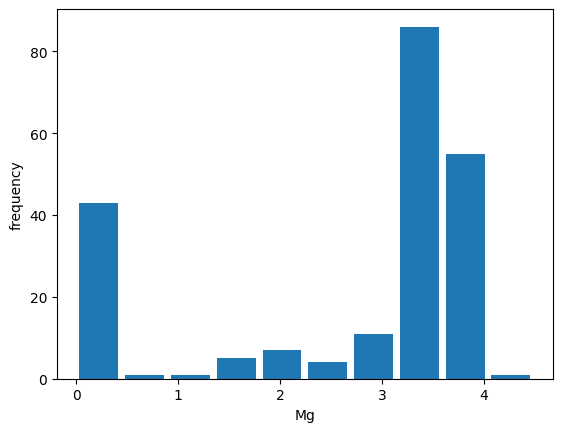

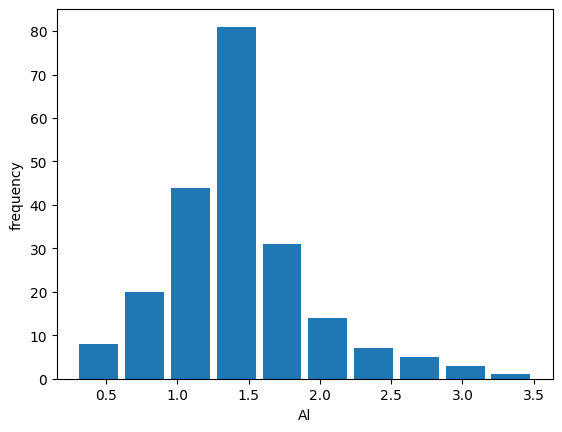

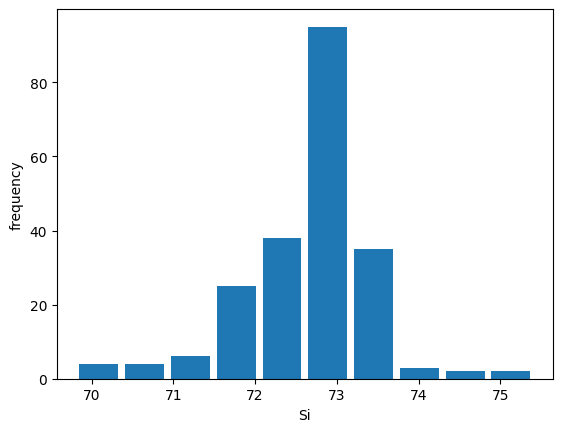

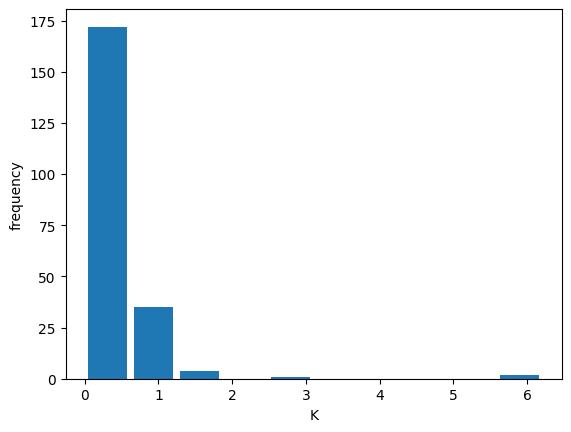

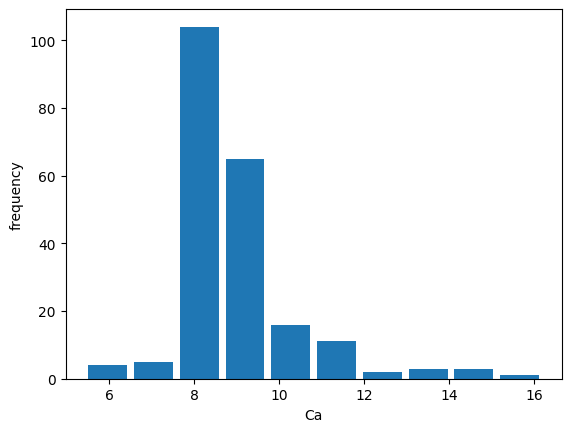

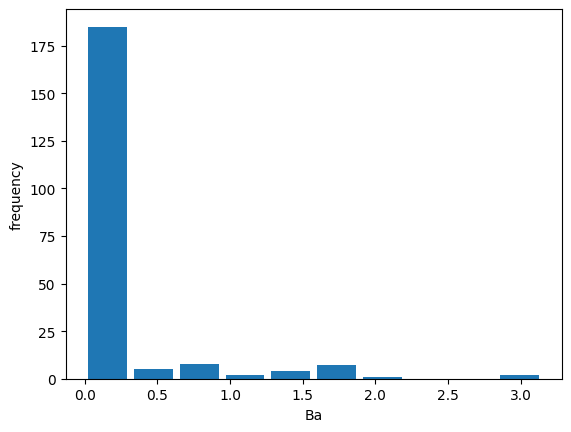

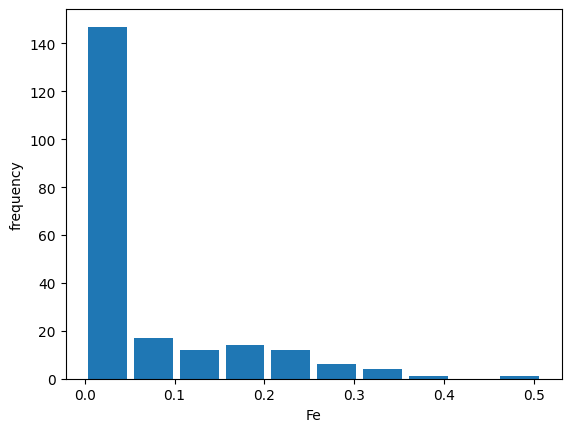

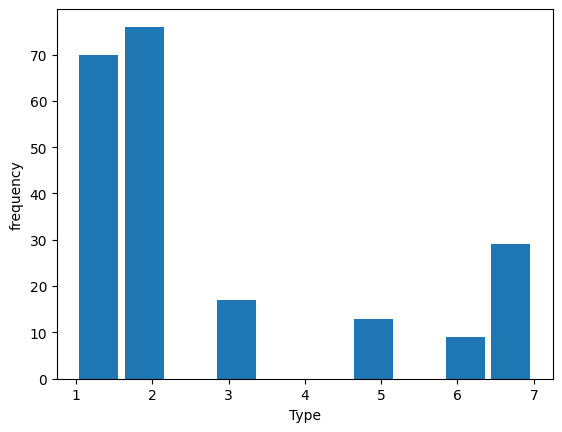

In [6]:
for i in df.columns:
    plt.xlabel(i)
    plt.ylabel('frequency')
    plt.hist(df[i], rwidth=0.85)
    plt.show()

[Text(0.5, 1.0, 'correlation')]

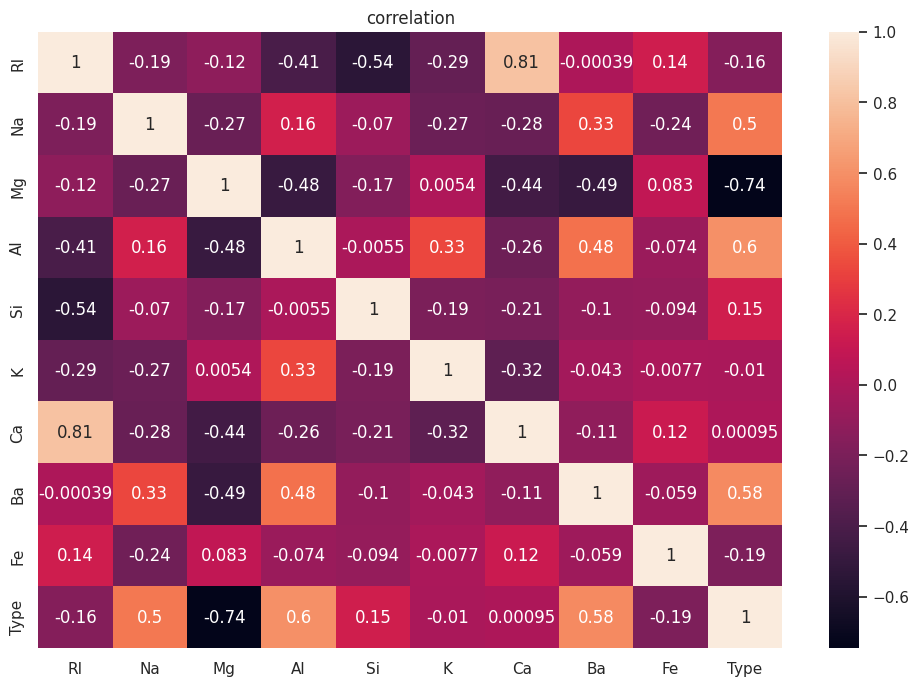

In [8]:
correlation = df.corr()
sns.set(rc={'figure.figsize': (12,8)})
sns.heatmap(correlation, annot=True).set(title='correlation')

<h2>Machine Learning</h2>

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
X = df.drop(columns='Type')
print(X.shape)
y = df['Type']
print(y.shape)


(214, 9)
(214,)


In [13]:
#spliting train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(171, 9) (43, 9) (171,) (43,)


In [25]:
#making the model
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [26]:
#prediction and performance
y_pred = knn.predict(X_test)

In [27]:
knn.score(X_test, y_test)

0.7906976744186046

In [28]:
acc = accuracy_score(y_test, y_pred)
print(f'The performance for this knn model is {acc}')

The performance for this knn model is 0.7906976744186046
